# Tentang Data
Kumpulan data ini adalah catatan setiap bangunan atau unit bangunan (apartemen, dll.) yang terjual di pasar properti New York City selama periode 12 bulan. Properti yang dijual di New York City selama periode 12 bulan dari September 2016 hingga September 2017

## Isi Dataset
Dataset ini berisi tentang lokasi, alamat, jenis, harga jual, dan tanggal penjualan unit bangunan yang terjual. Referensi tentang bidang yang lebih rumit:

- BOROUGH: Kode digit untuk wilayah tempat properti berada; dalam urutan ini adalah Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), dan Staten Island (5).
- BLOCK; LOT: Kombinasi borough, block, dan lot membentuk kunci unik untuk properti di New York City. Biasa disebut a BBL.
- BUILDING CLASS AT PRESENT dan BUILDING CLASS AT TIME OF SALE: Jenis bangunan pada berbagai titik waktu. Lihat glosarium yang ditautkan ke bawah.

Perhatikan bahwa karena ini adalah kumpulan data transaksi keuangan, ada beberapa hal yang perlu diingat:

- Banyak penjualan terjadi dengan jumlah dolar yang sangat kecil: $0 paling umum. Penjualan ini sebenarnya adalah transfer akta antar pihak: misalnya, orang tua mentransfer kepemilikan rumah mereka kepada seorang anak setelah pindah untuk pensiun.
- Dataset ini menggunakan definisi keuangan dari sebuah bangunan/unit bangunan, untuk tujuan perpajakan. Dalam hal satu entitas memiliki bangunan yang bersangkutan, penjualan mencakup nilai seluruh bangunan. Dalam hal sebuah bangunan dimiliki sedikit demi sedikit oleh penghuninya (kondominium), penjualan mengacu pada satu apartemen (atau sekelompok apartemen) yang dimiliki oleh beberapa individu.

In [1]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

from scipy.stats import t
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image

%matplotlib inline

import seaborn as sns

# Read Data

In [2]:
df_nycPropertySales = pd.read_csv('D:/HACTIVE/dataset/nyc-rolling-sales.csv')

df_nycPropertySales.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [3]:
df_nycPropertySales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [4]:
#list 5 wilayah
list(df_nycPropertySales["BOROUGH"].unique())

[1, 2, 3, 4, 5]

In [5]:
#list 254 neighborhood
neighborhood = list(df_nycPropertySales["NEIGHBORHOOD"].unique())
neighborhood

['ALPHABET CITY',
 'CHELSEA',
 'CHINATOWN',
 'CIVIC CENTER',
 'CLINTON',
 'EAST VILLAGE',
 'FASHION',
 'FINANCIAL',
 'FLATIRON',
 'GRAMERCY',
 'GREENWICH VILLAGE-CENTRAL',
 'GREENWICH VILLAGE-WEST',
 'HARLEM-CENTRAL',
 'HARLEM-EAST',
 'HARLEM-UPPER',
 'HARLEM-WEST',
 'INWOOD',
 'JAVITS CENTER',
 'KIPS BAY',
 'LITTLE ITALY',
 'LOWER EAST SIDE',
 'MANHATTAN VALLEY',
 'MIDTOWN CBD',
 'MIDTOWN EAST',
 'MIDTOWN WEST',
 'MORNINGSIDE HEIGHTS',
 'MURRAY HILL',
 'ROOSEVELT ISLAND',
 'SOHO',
 'SOUTHBRIDGE',
 'TRIBECA',
 'UPPER EAST SIDE (59-79)',
 'UPPER EAST SIDE (79-96)',
 'UPPER EAST SIDE (96-110)',
 'UPPER WEST SIDE (59-79)',
 'UPPER WEST SIDE (79-96)',
 'UPPER WEST SIDE (96-116)',
 'WASHINGTON HEIGHTS LOWER',
 'WASHINGTON HEIGHTS UPPER',
 'BATHGATE',
 'BAYCHESTER',
 'BEDFORD PARK/NORWOOD',
 'BELMONT',
 'BRONX PARK',
 'BRONXDALE',
 'CASTLE HILL/UNIONPORT',
 'CITY ISLAND',
 'CITY ISLAND-PELHAM STRIP',
 'CO-OP CITY',
 'COUNTRY CLUB',
 'CROTONA PARK',
 'EAST RIVER',
 'EAST TREMONT',
 'FIELDSTON

In [6]:
len(neighborhood)

254

In [7]:
#list 47 Kategori kelas bangunan
building = list(df_nycPropertySales["BUILDING CLASS CATEGORY"].unique())
building

['07 RENTALS - WALKUP APARTMENTS             ',
 '08 RENTALS - ELEVATOR APARTMENTS           ',
 '09 COOPS - WALKUP APARTMENTS               ',
 '10 COOPS - ELEVATOR APARTMENTS             ',
 '11A CONDO-RENTALS                           ',
 '12 CONDOS - WALKUP APARTMENTS              ',
 '13 CONDOS - ELEVATOR APARTMENTS            ',
 '14 RENTALS - 4-10 UNIT                     ',
 '15 CONDOS - 2-10 UNIT RESIDENTIAL          ',
 '16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT ',
 '17 CONDO COOPS                             ',
 '22 STORE BUILDINGS                         ',
 '37 RELIGIOUS FACILITIES                    ',
 '42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC  ',
 '46 CONDO STORE BUILDINGS                   ',
 '47 CONDO NON-BUSINESS STORAGE              ',
 '01 ONE FAMILY DWELLINGS                    ',
 '02 TWO FAMILY DWELLINGS                    ',
 '03 THREE FAMILY DWELLINGS                  ',
 '04 TAX CLASS 1 CONDOS                      ',
 '21 OFFICE BUILDINGS                  

In [8]:
len(building)

47

In [9]:
#list 166 kelas bangunan
building_class = list(df_nycPropertySales["BUILDING CLASS AT TIME OF SALE"].unique())
building_class

['C2',
 'C7',
 'C4',
 'D5',
 'D9',
 'D7',
 'D1',
 'C6',
 'D0',
 'D4',
 'RR',
 'R2',
 'R4',
 'S3',
 'S4',
 'S5',
 'R1',
 'R8',
 'R9',
 'K4',
 'M9',
 'M3',
 'RA',
 'RK',
 'RS',
 'A9',
 'A4',
 'B3',
 'B1',
 'S2',
 'C0',
 'R6',
 'C5',
 'C3',
 'C1',
 'D6',
 'S9',
 'O2',
 'O1',
 'O3',
 'O5',
 'O6',
 'K1',
 'K2',
 'L9',
 'L8',
 'L1',
 'H1',
 'H8',
 'H3',
 'R5',
 'G9',
 'G6',
 'P7',
 'M1',
 'N2',
 'RB',
 'RG',
 'RT',
 'K9',
 'V1',
 'GW',
 'G2',
 'I7',
 'M4',
 'Z9',
 'B9',
 'D3',
 'I9',
 'U6',
 'O4',
 'L3',
 'H2',
 'E1',
 'Z3',
 'Q1',
 'RW',
 'C9',
 'J5',
 'N9',
 'S1',
 'A5',
 'J8',
 'B2',
 'C8',
 'F5',
 'G7',
 'G5',
 'G4',
 'P2',
 'Q9',
 'Y1',
 'RP',
 'O8',
 'HR',
 'G1',
 'E7',
 'I5',
 'R3',
 'I4',
 'H9',
 'RH',
 'D8',
 'HB',
 'J4',
 'W2',
 'P9',
 'A7',
 'D2',
 'S0',
 'O7',
 'O9',
 'W3',
 'HS',
 'H6',
 'J9',
 'R0',
 'HH',
 'W8',
 'W6',
 'A1',
 'K5',
 'F1',
 'V9',
 'A2',
 'V0',
 'G0',
 'F4',
 'E9',
 'I3',
 'W4',
 'V3',
 'I1',
 'A6',
 'Q8',
 'A3',
 'Z0',
 'W1',
 'U1',
 'F2',
 'F9',
 'GU',
 'I6',

In [10]:
len(building_class)

166

In [11]:
#Jumlah data tiap kelas bangunan
df_DataBuilding = df_nycPropertySales.groupby(['BUILDING CLASS CATEGORY']).size()
df_DataBuilding

BUILDING CLASS CATEGORY
01 ONE FAMILY DWELLINGS                         18235
02 TWO FAMILY DWELLINGS                         15828
03 THREE FAMILY DWELLINGS                        4384
04 TAX CLASS 1 CONDOS                            1656
05 TAX CLASS 1 VACANT LAND                       1248
06 TAX CLASS 1 - OTHER                            182
07 RENTALS - WALKUP APARTMENTS                   3466
08 RENTALS - ELEVATOR APARTMENTS                  382
09 COOPS - WALKUP APARTMENTS                     2767
10 COOPS - ELEVATOR APARTMENTS                  12902
11 SPECIAL CONDO BILLING LOTS                       2
11A CONDO-RENTALS                                  43
12 CONDOS - WALKUP APARTMENTS                     926
13 CONDOS - ELEVATOR APARTMENTS                 12989
14 RENTALS - 4-10 UNIT                            671
15 CONDOS - 2-10 UNIT RESIDENTIAL                1281
16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT         96
17 CONDO COOPS                                   1201
18 T

## Interpretasi Data

data df_nycPropertySales memiliki data sebanyak 84.548 data dengan 22 kolom. pada data ini memiliki kolom wilayah, dimana wilayah tersebut dibagi menjadi 5. dan lingkungan wilayah sebanyak 254, untuk kategori kelas bangunan sebanyak 47 sedangkan kelas bangunan sebanyak 166.


# Analisis Data

## Missing Value

In [12]:
#Menghapus kolom yang tidak digunakan
df_nycPropertySales.drop(['BLOCK','LOT','TAX CLASS AT PRESENT','EASE-MENT','APARTMENT NUMBER','ADDRESS','ZIP CODE','TAX CLASS AT TIME OF SALE'], axis=1, inplace=True)

In [13]:
#Menghapus kolom yang tidak ada namanya
df_nyc = df_nycPropertySales.drop(df_nycPropertySales.columns[df_nycPropertySales.columns.str.contains('Unnamed', case=False)], axis=1)
df_nyc

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C2,5,0,5,1633,6440,1900,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C7,28,3,31,4616,18690,1900,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C7,16,1,17,2212,7803,1900,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C4,10,0,10,2272,6794,1913,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C2,6,0,6,2369,4615,1900,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,B9,2,0,2,2400,2575,1998,B9,450000,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,B9,2,0,2,2498,2377,1998,B9,550000,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,B2,2,0,2,4000,1496,1925,B2,460000,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,K6,0,7,7,208033,64117,2001,K6,11693337,2016-12-21 00:00:00


In [14]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   BUILDING CLASS AT PRESENT       84548 non-null  object
 4   RESIDENTIAL UNITS               84548 non-null  int64 
 5   COMMERCIAL UNITS                84548 non-null  int64 
 6   TOTAL UNITS                     84548 non-null  int64 
 7   LAND SQUARE FEET                84548 non-null  object
 8   GROSS SQUARE FEET               84548 non-null  object
 9   YEAR BUILT                      84548 non-null  int64 
 10  BUILDING CLASS AT TIME OF SALE  84548 non-null  object
 11  SALE PRICE                      84548 non-null  object
 12  SALE DATE                       84548 non-null

In [15]:
#Mengganti tipe data

categoricals = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
                'BUILDING CLASS AT TIME OF SALE','BUILDING CLASS AT PRESENT']

for col in categoricals:
    df_nyc[col] = df_nyc[col].astype('category')

In [16]:
df_nyc.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
BUILDING CLASS AT PRESENT         0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [17]:
df_nyc.isnull().values.any()

False

### Interpretasi

dapat dilihat pada cells 16, terlihat tidak terdapat missing value. namun, apabila dilihat pada cells 2 terdapat kolom yang barisnya terdapat string "-". oleh karena itu, saya ubah data menjadi numerical/NaN. sedangkan data yang akan dianalisis menjadi 13 kolom.

## Data Preprocessing and Cleaning

### Mengubah data menjadi numerical

In [18]:
num = ['LAND SQUARE FEET',
       'GROSS SQUARE FEET',
       'SALE PRICE'
      ]

for col in num:
    df_nyc[col] = pd.to_numeric(df_nyc[col], errors='coerce')

df_nyc.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C2,5,0,5,1633.0,6440.0,1900,C2,6625000.0,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C7,28,3,31,4616.0,18690.0,1900,C7,NaN,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C7,16,1,17,2212.0,7803.0,1900,C7,NaN,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C4,10,0,10,2272.0,6794.0,1913,C4,3936272.0,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C2,6,0,6,2369.0,4615.0,1900,C2,8000000.0,2016-11-17 00:00:00


In [19]:
df_nyc.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
BUILDING CLASS AT PRESENT             0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

### Menghapus Data Missing

In [20]:
df_nyc = df_nyc.dropna()

In [21]:
df_nyc.isnull().any()

BOROUGH                           False
NEIGHBORHOOD                      False
BUILDING CLASS CATEGORY           False
BUILDING CLASS AT PRESENT         False
RESIDENTIAL UNITS                 False
COMMERCIAL UNITS                  False
TOTAL UNITS                       False
LAND SQUARE FEET                  False
GROSS SQUARE FEET                 False
YEAR BUILT                        False
BUILDING CLASS AT TIME OF SALE    False
SALE PRICE                        False
SALE DATE                         False
dtype: bool

In [22]:
df_nyc.shape

(48244, 13)

### Mengecek duplikat value

In [23]:
df_nyc.duplicated().sum()

959

In [24]:
df_nyc = df_nyc.drop_duplicates(df_nyc.columns, keep='last')

In [25]:
df_nyc.duplicated().sum()

0

In [26]:
df_nyc.shape

(47285, 13)

In [27]:
df_nyc.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C2,5,0,5,1633.0,6440.0,1900,C2,6625000.0,2017-07-19 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C4,10,0,10,2272.0,6794.0,1913,C4,3936272.0,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C2,6,0,6,2369.0,4615.0,1900,C2,8000000.0,2016-11-17 00:00:00
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C4,8,0,8,1750.0,4226.0,1920,C4,3192840.0,2016-09-23 00:00:00
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,D9,24,0,24,4489.0,18523.0,1920,D9,16232000.0,2016-11-07 00:00:00


In [28]:
df_nyc.tail()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,B9,2,0,2,2400.0,2575.0,1998,B9,450000.0,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,B9,2,0,2,2498.0,2377.0,1998,B9,550000.0,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,B2,2,0,2,4000.0,1496.0,1925,B2,460000.0,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,K6,0,7,7,208033.0,64117.0,2001,K6,11693337.0,2016-12-21 00:00:00
84547,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,P9,0,1,1,10796.0,2400.0,2006,P9,69300.0,2016-10-27 00:00:00


### Interpretasi

setelah data diubah menjadi numerical, dapat dilihat diatas bahwa terdapat missing pada kolom LAND SQUARE FEET sebanyak 26.252, kolom GROSS SQUARE FEET   sebanuak 27.612 dan kolom SALE PRICE sebanyak 14.561. dengan demikian dilakukan cleaning data/menghapus data missing value karena data missing lebih dari 25%. dan setelah menghapus missing value diperoleh data sebanyak 48.244 data, namun sebelum dilakukan analisis dan dicek missing value kita perlu mengecek apakah data tersebut duplikat atau tidak, setelah dicek terdapat 959 data duplikat. oleh karena itu kita perlu menghapus data duplikat dan diperoleh data sebanyak 47.285

### Jumlah data berdasarkan year built = 0

In [29]:
df_year = df_nyc[df_nyc["YEAR BUILT"] == 0]
df_year.shape

(2704, 13)

In [30]:
#Mengganti nilai 0 pada year built dengan nilai median
median = df_nyc['YEAR BUILT'].median()
df_nyc['YEAR BUILT'].replace(0,median, inplace=True)

In [31]:
median

1931.0

In [32]:
df_nyc.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C2,5,0,5,1633.0,6440.0,1900,C2,6625000.0,2017-07-19 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C4,10,0,10,2272.0,6794.0,1913,C4,3936272.0,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C2,6,0,6,2369.0,4615.0,1900,C2,8000000.0,2016-11-17 00:00:00
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C4,8,0,8,1750.0,4226.0,1920,C4,3192840.0,2016-09-23 00:00:00
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,D9,24,0,24,4489.0,18523.0,1920,D9,16232000.0,2016-11-07 00:00:00


### Interpretasi

dapat dilihat juga pada cells 29, mengecek data year built karena terdapat 2.704 data yang barisnya berisi 0. oleh karena itu, data yang bernilai 0 di replace dengan median dari year built yaitu tahun 1931.

### Mapping pada kolom Borough

Merubah kolom borough yang masih berupa angka, diubah menjadi nama borough sesuai dengan keterangan yang ada pada isi dataset

In [33]:
df_nyc['BOROUGH'] = df_nyc['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3: 'Brooklyn', 4:'Queens',5:'Staten Island'})
df_nyc.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C2,5,0,5,1633.0,6440.0,1900,C2,6625000.0,2017-07-19 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C4,10,0,10,2272.0,6794.0,1913,C4,3936272.0,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C2,6,0,6,2369.0,4615.0,1900,C2,8000000.0,2016-11-17 00:00:00
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C4,8,0,8,1750.0,4226.0,1920,C4,3192840.0,2016-09-23 00:00:00
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,D9,24,0,24,4489.0,18523.0,1920,D9,16232000.0,2016-11-07 00:00:00


### Mengecek Outlier

In [34]:
df_nyc.describe()

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,47285.000000,47285.000000,47285.000000,4.728500e+04,4.728500e+04,47285.000000,4.728500e+04
mean,2.514053,0.239717,2.770561,3.291470e+03,3.530269e+03,1943.939093,1.171341e+06
std,16.532690,10.915300,19.935527,3.071844e+04,2.916192e+04,33.177129,1.352859e+07
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1800.000000,0.000000e+00
25%,1.000000,0.000000,1.000000,1.463000e+03,8.840000e+02,1920.000000,1.247340e+05
50%,1.000000,0.000000,1.000000,2.150000e+03,1.628000e+03,1931.000000,4.900000e+05
75%,2.000000,0.000000,2.000000,3.088000e+03,2.520000e+03,1960.000000,8.400000e+05
max,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2017.000000,2.210000e+09


C:\Users\Rizqatasyaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SALE PRICE'>

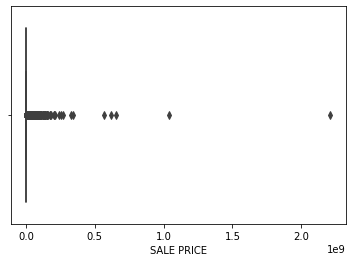

In [35]:
sns.boxplot(df_nyc['SALE PRICE'])

### Interpretasi

dapat dilihat pada boxplot diatas, terlihat bahwa data harga penjualan properti di newyork terdapat pencilan atau nilai ekstrim yaitu 2.210.000.000, oleh karena itu perlu diatasi agar outlier pada data ini hilang. 

In [36]:
#Deteksi Outlier
def remove_outlier(df_nyc, sale_price):
    Q1 = df_nyc["SALE PRICE"].quantile(0.25)
    Q3 = df_nyc["SALE PRICE"].quantile(0.75)
    IQR = Q3 - Q1
    maximum = Q3 + (1.5*IQR)
    minimum = Q1 - (1.5*IQR)
    df_out = df_nyc.loc[(df_nyc["SALE PRICE"] < maximum) & (df_nyc["SALE PRICE"] > minimum)]
    return df_out

df_fill = remove_outlier(df_nyc, df_nyc["SALE PRICE"])
df_fill.describe()

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,44064.000000,44064.000000,44064.000000,4.406400e+04,4.406400e+04,44064.000000,4.406400e+04
mean,1.941086,0.155705,2.114651,2.847442e+03,2.493790e+03,1944.540033,4.947348e+05
std,12.852568,10.859766,16.907784,2.562290e+04,2.392048e+04,32.720223,4.318727e+05
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1800.000000,0.000000e+00
25%,1.000000,0.000000,1.000000,1.430750e+03,8.400000e+02,1920.000000,5.000000e+04
50%,1.000000,0.000000,1.000000,2.125000e+03,1.575000e+03,1931.000000,4.550000e+05
75%,2.000000,0.000000,2.000000,3.000000e+03,2.365000e+03,1960.000000,7.450000e+05
max,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2017.000000,1.910000e+06


C:\Users\Rizqatasyaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SALE PRICE'>

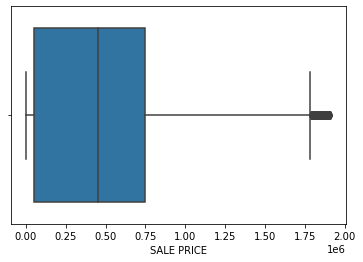

In [37]:
sns.boxplot(df_fill['SALE PRICE'])

### Interpretasi

setelah meremove outlier, dan diperoleh nilai maksimum pada kolom SALE PRICE adalah sekitar 2.000.000 USD, sedangkan nilai kuartil 1 sekitar 50.000 USD dan kuartil 3 sekitar 750.000 USD. Maka dari itu, akan dilihat distribusi frekuensi kolom SALE PRICE dimana nilai penjualan dibawah 50.000 USD tidak ikut dianalis dan berdasarkan boxplot diatas, penjualan diatas 1.750.000 USD tidak ikut dianalisis karena merupakan nilai outlier.

Text(0.5, 1.0, 'Distribusi SALE PRICE')

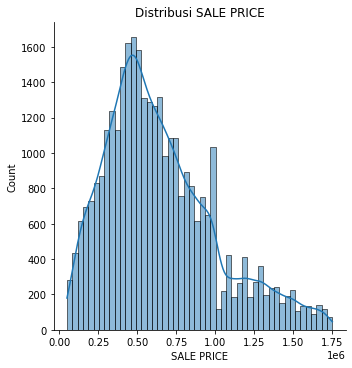

In [38]:
df_fill = df_fill[(df_fill['SALE PRICE']>50000) & (df_fill['SALE PRICE']<1750000)]
sns.displot(df_fill['SALE PRICE'], kde=True, bins=50)
plt.title('Distribusi SALE PRICE')

### Cek LAND SQUARE FEET dan GROSS SQUARE FEET

pada kolom ini terdapat nilai 0, sehingga baris yang mengandung nilai 0 pada kedua kolom ini tidak ikut dianalisis, karena ukuran lahan properti ini tidak sesuai/tidak memungkinkan bernilai 0

In [39]:
df_sales = df_fill[df_fill['LAND SQUARE FEET'] != 0]
df_sales = df_fill[df_fill['GROSS SQUARE FEET'] != 0]

### Cek TOTAL UNITS

In [40]:
df_fill[['TOTAL UNITS','SALE PRICE']].groupby(['TOTAL UNITS']).count().sort_values(by='SALE PRICE',ascending=False)

,SALE PRICE
TOTAL UNITS,
1,15994
2,9164
0,3820
3,2459
4,550
...,...
72,1
75,1
84,1


In [41]:
df_sales = df_fill[(df_fill['TOTAL UNITS'] > 0) & (df_fill['TOTAL UNITS'] != 2261)]

### Interpretasi

Berdasarkan tabel diatas, diketahui bahwa terdapat 1 gedung properti yang memiliki total unit 2.261 yang artinya nilai tersebut tidak signifikan atau tidak sesuai. sehingga baris ini tidak ikut dalam analisis.

# Final Data

setelah dilakukan preprocessing dan data cleaning, dihasilkan data sebanyak 28.795 dan 13 kolom.

In [42]:
df_sales.shape

(28795, 13)

In [43]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28795 entries, 222 to 84547
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         28795 non-null  category
 1   NEIGHBORHOOD                    28795 non-null  category
 2   BUILDING CLASS CATEGORY         28795 non-null  category
 3   BUILDING CLASS AT PRESENT       28795 non-null  category
 4   RESIDENTIAL UNITS               28795 non-null  int64   
 5   COMMERCIAL UNITS                28795 non-null  int64   
 6   TOTAL UNITS                     28795 non-null  int64   
 7   LAND SQUARE FEET                28795 non-null  float64 
 8   GROSS SQUARE FEET               28795 non-null  float64 
 9   YEAR BUILT                      28795 non-null  int64   
 10  BUILDING CLASS AT TIME OF SALE  28795 non-null  category
 11  SALE PRICE                      28795 non-null  float64 
 12  SALE DATE       

In [44]:
df_sales.describe()

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,28795.000000,28795.000000,28795.000000,2.879500e+04,2.879500e+04,28795.000000,2.879500e+04
mean,1.846571,0.070394,1.920611,2.998456e+03,2.156157e+03,1946.450043,6.731770e+05
std,12.610407,0.886962,12.767614,2.825191e+04,2.380774e+04,33.780905,3.462644e+05
min,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,1800.000000,5.020000e+04
25%,1.000000,0.000000,1.000000,1.800000e+03,1.156000e+03,1920.000000,4.250000e+05
50%,1.000000,0.000000,1.000000,2.400000e+03,1.600000e+03,1935.000000,6.000000e+05
75%,2.000000,0.000000,2.000000,3.400000e+03,2.250000e+03,1965.000000,8.600000e+05
max,1844.000000,126.000000,1866.000000,4.228300e+06,3.750565e+06,2017.000000,1.749000e+06


# Analisis data dengan statistik deskriptif dan inferensial

## Analisis Deskriptif

### Mean
Berapakah rata-rata harga penjualan properti di newyork periode 12 bulan?

In [45]:
mean_SP = np.mean(df_sales["SALE PRICE"])
mean_SP

673176.9851015802

### Median
Berapakah nilai tengah dari harga penjualan properti di newyork?

In [46]:
median_SP = np.median(df_sales["SALE PRICE"])
median_SP

600000.0

### Modus
nilai modus harga penjualan properti di newyork?

In [47]:
mode_SP = scipy.stats.mode(df_sales["SALE PRICE"])
mode_SP

ModeResult(mode=array([600000.]), count=array([308]))

In [48]:
# Analisis Descriptive SALE PRICE
df_sales["SALE PRICE"].describe()

count    2.879500e+04
mean     6.731770e+05
std      3.462644e+05
min      5.020000e+04
25%      4.250000e+05
50%      6.000000e+05
75%      8.600000e+05
max      1.749000e+06
Name: SALE PRICE, dtype: float64

C:\Users\Rizqatasyaa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


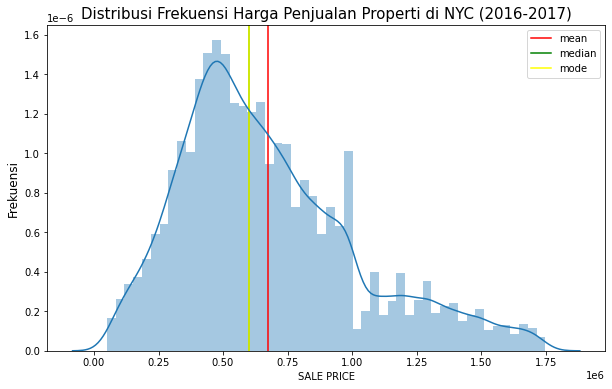

In [49]:
plt.figure(figsize = (10, 6))
plt.title("Distribusi Frekuensi Harga Penjualan Properti di NYC (2016-2017)", fontsize=15)
plt.ylabel('Frekuensi', fontsize=12)
plt.axvline(df_sales['SALE PRICE'].describe()['mean'], color = 'red', label = 'mean')
plt.axvline(df_sales['SALE PRICE'].describe()['50%'], color = 'green', label = 'median')
plt.axvline(df_sales['SALE PRICE'].mode()[0], color = 'yellow', label = 'mode')
sns.distplot(df_sales['SALE PRICE'])
plt.legend()

### Interpretasi

berdasarkan plot diatas, dapat dilihat pemusatan data harga penjualan properti di NYC dimana rata-rata harga penjualan sebesar 673.177 USD, median dan modus dari harga penjualan sebesar 600.000 USD. dan untuk frekuensi tertinggi harga penjualan properti dibawah 500.000 USD. 

### Range
berapa range dari harga penjualan properti di NYC ?

In [50]:
range_SP = np.ptp(df_sales['SALE PRICE'])
range_SP

1698800.0

### Varians
berapa varian dari harga penjualan properti di NYC?

In [51]:
var_SP = np.var(df_sales["SALE PRICE"], ddof=1)
var_SP

119899022434.09659

### Standar Deviasi

In [52]:
std_SP = np.std(df_sales["SALE PRICE"], ddof=1)
std_SP

346264.3822776125

### Skewness

In [53]:
skew_SP = scipy.stats.skew(df_sales['SALE PRICE'], bias=False)
skew_SP

0.8431839788042697

## Distribusi Data SALE PRICE

C:\Users\Rizqatasyaa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


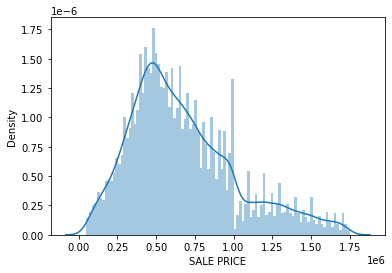

Penyebaran Data SALE PRICE NYC:

Range:  1698800.0
Variance:  119899022434.09659
Standar Deviation:  346264.3822776125
Skewness:  0.8431839788042697
Kurtosis: 0.33668398099480834


In [54]:
data = df_sales["SALE PRICE"]
np.var(data)

sns.distplot(data, kde=True, bins=100)
plt.show()

print("Penyebaran Data SALE PRICE NYC:\n")
print('Range: ', range_SP)
print('Variance: ', var_SP)
print('Standar Deviation: ', std_SP)
print('Skewness: ', skew_SP)
print('Kurtosis:', data.kurt())

### Interpretasi

dapat dilihat plot harga penjualan properti di NYC memiliki sebaran yaitu positive skew atau yang artinya sebaran data mlenceng ke kanan. sedangkan untuk range harga penjualan atau selisih nilai maksimum dan minimum dari data SALE PRICE ini sebesar 1.698.800 USD , untuk varian dari data ini cukup besar yang artinya data sangat bervariasi atau tersebar disekitar reratanya. dengan nilai stanar deviasi sebesar 346.264 , dimana nilai tersebut lebih kecil dari mean yang artinya nilai standar deviasi ini dikatakan baik, atau mendekati rata-rata.

## Analisis Deskriptif SALE PRICE Berdasarkan wilayah

In [55]:
# Membuat tabel nilai harga penjualan berdasarkan masing-masing borough
df_manhattan = df_sales[df_sales['BOROUGH']=='Manhattan']
df_bronx = df_sales[df_sales['BOROUGH']=='Bronx']
df_brooklyn = df_sales[df_sales['BOROUGH']=='Brooklyn']
df_queens = df_sales[df_sales['BOROUGH']=='Queens']
df_staten = df_sales[df_sales['BOROUGH']=='Staten Island']

# Menampilkan nilai varians dan standar deviasi masing-masing borough
print("Variance and Standar Deviation tiap wilayah:\n")
print('Manhattan: ',np.var(df_manhattan['SALE PRICE'], ddof=1), 'and',np.std(df_manhattan['SALE PRICE'], ddof=1))
print('Bronx: ',np.var(df_bronx['SALE PRICE'], ddof=1), 'and',np.std(df_bronx['SALE PRICE'], ddof=1))
print('Brooklyn: ',np.var(df_brooklyn['SALE PRICE'], ddof=1), 'and',np.std(df_brooklyn['SALE PRICE'], ddof=1))
print('Queens: ',np.var(df_queens['SALE PRICE'], ddof=1), 'and',np.std(df_queens['SALE PRICE'], ddof=1))
print('Staten Island: ',np.var(df_staten['SALE PRICE'], ddof=1), 'and',np.std(df_staten['SALE PRICE'], ddof=1))

Variance and Standar Deviation tiap wilayah:

Manhattan:  322867787161.7291 and 568214.5608497983
Bronx:  53390110235.81175 and 231063.00057735716
Brooklyn:  148492349759.99277 and 385347.0510591625
Queens:  99399579268.92471 and 315276.98816901416
Staten Island:  44225410289.46873 and 210298.3839440254


C:\Users\Rizqatasyaa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


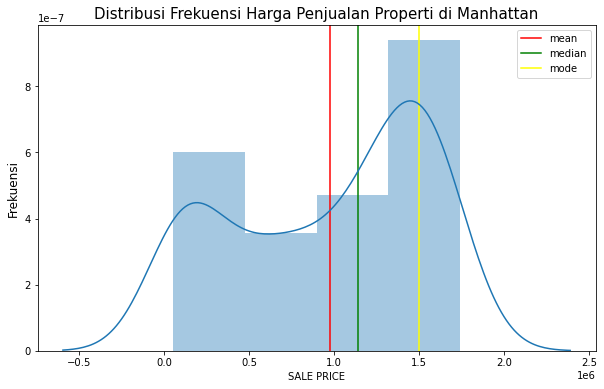

In [56]:
plt.figure(figsize = (10, 6))
plt.title("Distribusi Frekuensi Harga Penjualan Properti di Manhattan", fontsize=15)
plt.ylabel('Frekuensi', fontsize=12)
plt.axvline(df_manhattan['SALE PRICE'].describe()['mean'], color = 'red', label = 'mean')
plt.axvline(df_manhattan['SALE PRICE'].describe()['50%'], color = 'green', label = 'median')
plt.axvline(df_manhattan['SALE PRICE'].mode()[0], color = 'yellow', label = 'mode')
sns.distplot(df_manhattan['SALE PRICE'])
plt.legend()

C:\Users\Rizqatasyaa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


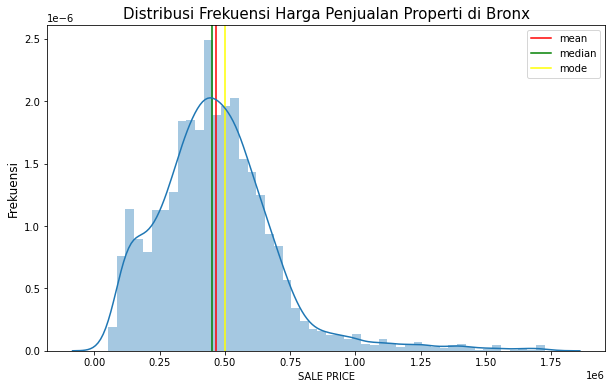

In [57]:
plt.figure(figsize = (10, 6))
plt.title("Distribusi Frekuensi Harga Penjualan Properti di Bronx", fontsize=15)
plt.ylabel('Frekuensi', fontsize=12)
plt.axvline(df_bronx['SALE PRICE'].describe()['mean'], color = 'red', label = 'mean')
plt.axvline(df_bronx['SALE PRICE'].describe()['50%'], color = 'green', label = 'median')
plt.axvline(df_bronx['SALE PRICE'].mode()[0], color = 'yellow', label = 'mode')
sns.distplot(df_bronx['SALE PRICE'])
plt.legend()

C:\Users\Rizqatasyaa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


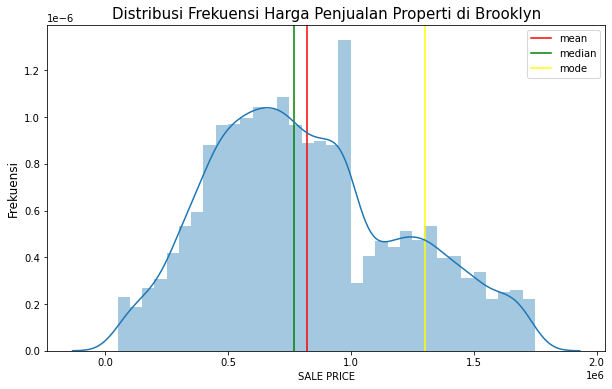

In [58]:
plt.figure(figsize = (10, 6))
plt.title("Distribusi Frekuensi Harga Penjualan Properti di Brooklyn", fontsize=15)
plt.ylabel('Frekuensi', fontsize=12)
plt.axvline(df_brooklyn['SALE PRICE'].describe()['mean'], color = 'red', label = 'mean')
plt.axvline(df_brooklyn['SALE PRICE'].describe()['50%'], color = 'green', label = 'median')
plt.axvline(df_brooklyn['SALE PRICE'].mode()[0], color = 'yellow', label = 'mode')
sns.distplot(df_brooklyn['SALE PRICE'])
plt.legend()

C:\Users\Rizqatasyaa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


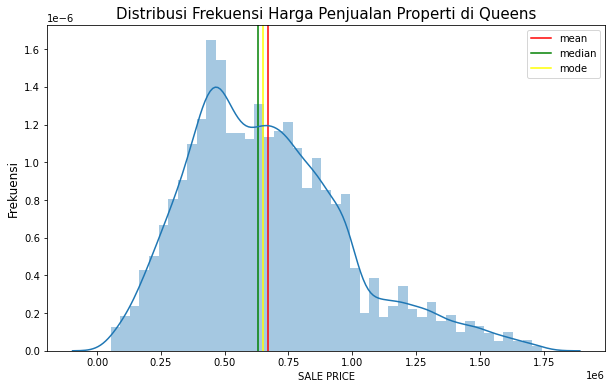

In [59]:
plt.figure(figsize = (10, 6))
plt.title("Distribusi Frekuensi Harga Penjualan Properti di Queens", fontsize=15)
plt.ylabel('Frekuensi', fontsize=12)
plt.axvline(df_queens['SALE PRICE'].describe()['mean'], color = 'red', label = 'mean')
plt.axvline(df_queens['SALE PRICE'].describe()['50%'], color = 'green', label = 'median')
plt.axvline(df_queens['SALE PRICE'].mode()[0], color = 'yellow', label = 'mode')
sns.distplot(df_queens['SALE PRICE'])
plt.legend()

C:\Users\Rizqatasyaa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


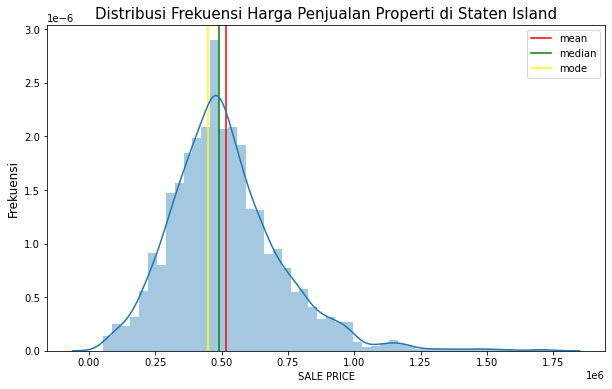

In [60]:
plt.figure(figsize = (10, 6))
plt.title("Distribusi Frekuensi Harga Penjualan Properti di Staten Island", fontsize=15)
plt.ylabel('Frekuensi', fontsize=12)
plt.axvline(df_staten['SALE PRICE'].describe()['mean'], color = 'red', label = 'mean')
plt.axvline(df_staten['SALE PRICE'].describe()['50%'], color = 'green', label = 'median')
plt.axvline(df_staten['SALE PRICE'].mode()[0], color = 'yellow', label = 'mode')
sns.distplot(df_staten['SALE PRICE'])
plt.legend()

### Interpretasi

Dapat dilihat distribusi SALE PRICE tiap wilayah, distribusi yang terlihat normal yaitu pada wilayah Bronx dan Staten Island.

## Analisis Statistik SALE PRICE berdasarkan BUILDING CLASS AT TIME OF SALE

In [61]:
df_BuildClass = df_sales[['BUILDING CLASS AT TIME OF SALE','SALE PRICE']]

# Top 5 
top5BuildClass = df_BuildClass.groupby('BUILDING CLASS AT TIME OF SALE').mean().sort_values(by='SALE PRICE', ascending=True)
top5BuildClass = top5BuildClass.head(5)
top5BuildClass

,SALE PRICE
BUILDING CLASS AT TIME OF SALE,
RS,86100.000000
CM,90000.000000
RP,106340.916667
H3,107486.727273
RG,178006.278481


In [62]:
df_sales['BUILDING CLASS AT TIME OF SALE'].mode()[0]

'A1'

<AxesSubplot:ylabel='BUILDING CLASS AT TIME OF SALE'>

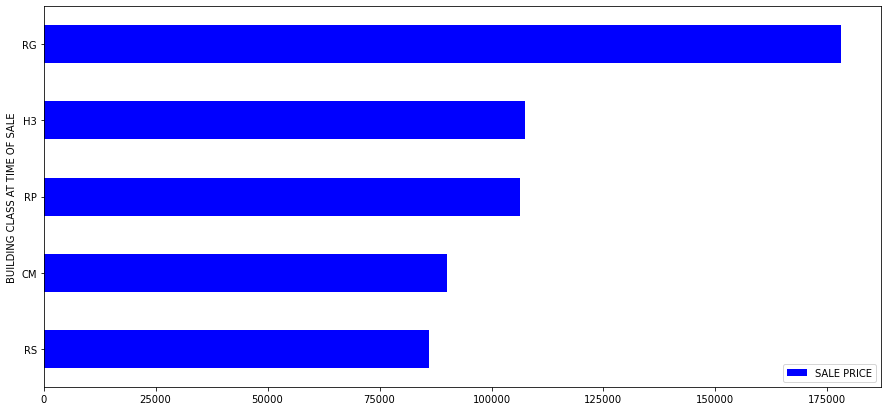

In [63]:
top5BuildClass.plot(kind='barh', figsize=(15,7), color='b')

### Interpretasi

berdasarkan analisis diatas, diketahui bangunan kelas berdasarkan rata-rata penjualan tertinggi yaitu RG sebesar 178.006 USD, sedangkan untuk kelas bangunan dengan modus terbanyak yaitu A1

## Confidence Interval (CI)

In [64]:
x = df_sales['SALE PRICE']

m = x.mean()
s = x.std()
dof = len(x)-1 #degree of freedom untuk memnentukan nilai statistik uji

confidance = 0.95 #Peluang
t_crit = np.abs(t.ppf((1-confidance)/2,dof)) #nilai statistik uji t

values = np.round((m-s*t_crit/np.sqrt(len(x)), m+s*t_crit/np.sqrt(len(x))),2)

print(values)

[669177.39 677176.58]


### Interpretasi

diperoleh confidence interval atau selang kepercayaan SALE PRICE yaitu perkiraan rentang harga penjualan properti di NYC sebesar 669177.39 USD sampai 677176.58 USD 

## Hypotesis Testing

### Uji D'Agostino's K^2

Berdasarkan data SALE PRICE pada dataset penjualan properti di NYC , selidikilah apakah data tersebut berdistribusi normal pada alpha 5% menggunakan uji D'Agostino's K^2? 

H0 : SALE PRICE Berdistribusi Normal\
H1 : SALE PRICE Tidak Berdistribusi Normal

In [65]:
from scipy.stats import normaltest
data = df_sales["SALE PRICE"]
stat, p = normaltest(data)
print('stat=%3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=2718.675619, p=0.000
Probably not Gaussian


Berdasarkan hasil uji D'Agostino's K^2 diketahui bahwa p-value < 0.05 yang artinya tolak H0, sehingga SALE PRICE Tidak Berdistribusi Normal

### Uji Spearman's

Apakah ada hubungan antara LAND SQUARE FEET dengan SALE PRICE menggunakan uji Spearman's sebagai berikut :

H0 : Tidak ada hubungan antara Land Square Feet dengan Sale Price\
H1 : Ada hubungan antara Land Square Feet dengan Sale Price

In [66]:
from scipy.stats import spearmanr
data1 = df_sales['LAND SQUARE FEET']
data2 = df_sales['SALE PRICE']
stat, p = spearmanr(data1, data2)
print('stat=%3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Independent')
else:
    print('Probably Dependent')

stat=0.026053, p=0.000
Probably Dependent


diketahui bahwa data SALE PRICE dan LAND SQUARE FEET merupakan data yang tidak berdistribusi normal, oleh karena itu menggunakan metode uji Spearman's karena syarat pada metode ini adalah variabel tidak harus berdistribusi normal dan kondisi variabel tidak diketahui sama. dan diperoleh hasil analisis uji spearman's didapat p-value < 0.05 yang artinya tolak H0 atau terima H1 yang artinya Ada hubungan antara Land Square Feet dengan Sale Price

Apakah ada hubungan antara GROSS SQUARE FEET dengan SALE PRICE menggunakan uji Spearman's sebagai berikut :

H0 : Tidak ada hubungan antara Gross Square Feet dengan Sale Price\
H1 : Ada hubungan antara Gross Square Feet dengan Sale Price

In [67]:
from scipy.stats import spearmanr
data1 = df_sales['GROSS SQUARE FEET']
data2 = df_sales['SALE PRICE']
stat, p = spearmanr(data1, data2)
print('stat=%3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Independent')
else:
    print('Probably Dependent')

stat=0.261017, p=0.000
Probably Dependent


diketahui bahwa data SALE PRICE dan GROSS SQUARE FEET merupakan data yang tidak berdistribusi normal, oleh karena itu menggunakan metode uji Spearman's karena syarat pada metode ini adalah variabel tidak harus berdistribusi normal dan kondisi variabel tidak diketahui sama. dan diperoleh hasil analisis uji spearman's didapat p-value < 0.05 yang artinya tolak H0 atau terima H1 yang artinya Ada hubungan antara Gross Square Feet dengan Sale Price

## Kesimpulan

Berdasarkan analisis statistik deskriptif dan inferensia, diperoleh kesimpulan sebagai berikut :

- Total data yang dianalisis setelah dilakukan data cleaning dan preprocessing yaitu 28.795 data.
- Rata-rata harga penjualan properti di NYC  sebesar 673.176 USD , median dan modus sebesar 600.000 USD
- Memiliki varian dan standar deviasi sebesar 119899022434 dan 346264, sedangkan untuk range harga penjualan ini adalah 1.698.800 USD
- untuk distribusi harga penjualan properti ini yaitu mlenceng ke kanan atau data tidak berdistribusi normal berdasarkan hasil uji D'Agostino's K^2
- selain itu, wilayah yang terlihat memiliki distribusi normal berdasarkan harga penjualan properti yaitu pada wilayah Bronx dan Staten Island.
- dengan kelas bangunan yang paling banyak yaitu A1 dan kelas bangunan dengan rata2 harga penjualan paling tinggi yaitu RG sebesar 178006.278481 USD
- untuk harga penjualan memiliki selang kepercayaan pada rentang  669177.39 USD sampai 677176.58 USD
- untuk Land Square Feet dan Gross Square Feet memiliki hubungan dengan Sale Price berdasarkan uji spearman's